<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_svm_nonlinear_Gaussian_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear SVM Classifier

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Explore nonlinear classifer provided by __Scikit Learn__ library, specifically SVC classifier with Gaussian RBF kernel

## Import  Data
For this exercise, I import `make_moons` dataset from `sklearn` which requires a nonlinear decision boundary. Let's import the necessary libraries and the datasets.

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

To show how the `noise` parameter of the data works, I am going to create two datsets, with and without noise.

In [4]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.15, random_state=42)

## Inspect Data

In [5]:
print(X.shape, y.shape)
print(X[:5], y[:5])

(100, 2) (100,)
[[ 1.61383833 -0.49115086]
 [ 0.08984723  0.50439056]
 [ 0.74721047 -0.36911116]
 [-1.10174514  0.23685641]
 [-0.72871455  0.14652347]] [1 1 1 0 0]


## Plot Data

In [6]:
def decorate(ax, title=''):


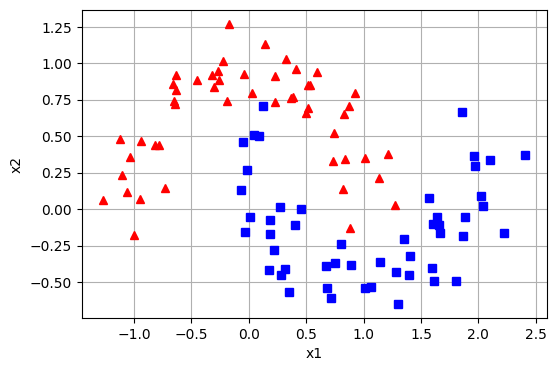

In [8]:
plt.figure(figsize=(6, 4))

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("x1", fontsize=10)
plt.ylabel("x2", fontsize=10)
plt.grid()

plt.show()

In [23]:
gamma_list = [0.1, 1, 5]
C_list = [0.001, 10, 1000]

rbf_clf_list = []
for gamma in gamma_list:
  for C in C_list:
      rbf_clf = make_pipeline(
          StandardScaler(),
          SVC(kernel="rbf", gamma=gamma, C=C)
      )
      rbf_clf.fit(X, y)
      rbf_clf_list.append(rbf_clf)

## Plot Classifiers

First, let's define the helper functions.

In [24]:
def plot_dataset(X, y, axis, title):
    axis.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    axis.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    axis.set_xlabel(r"$x_1$", fontsize=12)
    axis.set_ylabel(r"$x_2$", fontsize=12, rotation=0)
    axis.set_title(title, fontsize=12)
    axis.grid(True)

def generate_meshgrid(x_limits, n=100):
    x0_min, x0_max = x_limits[0]
    x1_min, x1_max = x_limits[1]
    x0_vec = np.linspace(x0_min, x0_max, n) # shape (n,)
    x1_vec = np.linspace(x1_min, x1_max, n) # shape (n,)
    x0, x1 = np.meshgrid(x0_vec, x1_vec) # shape of x0 and x1 (n, n)
    x = np.c_[x0.ravel(), x1.ravel()] # shape of x (n**2, 2), shape of x0.ravel() and x1.ravel() (n**2,)
    return x0, x1, x

def make_predictions(clf, x):
    # shape of x (n**2, 2) for 2D space (2 features)
    y_pred = clf.predict(x) # shape (n**2,), this defines the boundary curve (true/flase)
    y_decision = clf.decision_function(x) # shape (n**2,), this defines the contour curves
    return y_pred, y_decision

def plot_predictions(clf, x_limits, n, axis):
    x0, x1, x = generate_meshgrid(x_limits, n)
    y_pred, y_decision = make_predictions(clf, x)
    axis.contourf(x0, x1, y_pred.reshape(x0.shape), cmap=plt.cm.coolwarm, alpha=0.3) # Defines the boundary curve
    axis.contourf(x0, x1, y_decision.reshape(x0.shape), cmap=plt.cm.coolwarm, alpha=0.2) # Defines the contour curves

def create_titles(gamma_list, C_list):
  titles = []
  for gamma in gamma_list:
      for C in C_list:
          title = r"$\gamma = {}, C = {}$".format(gamma, C)
          titles.append(title)
  return titles

Now, I plot the classifiers using a for-loop.

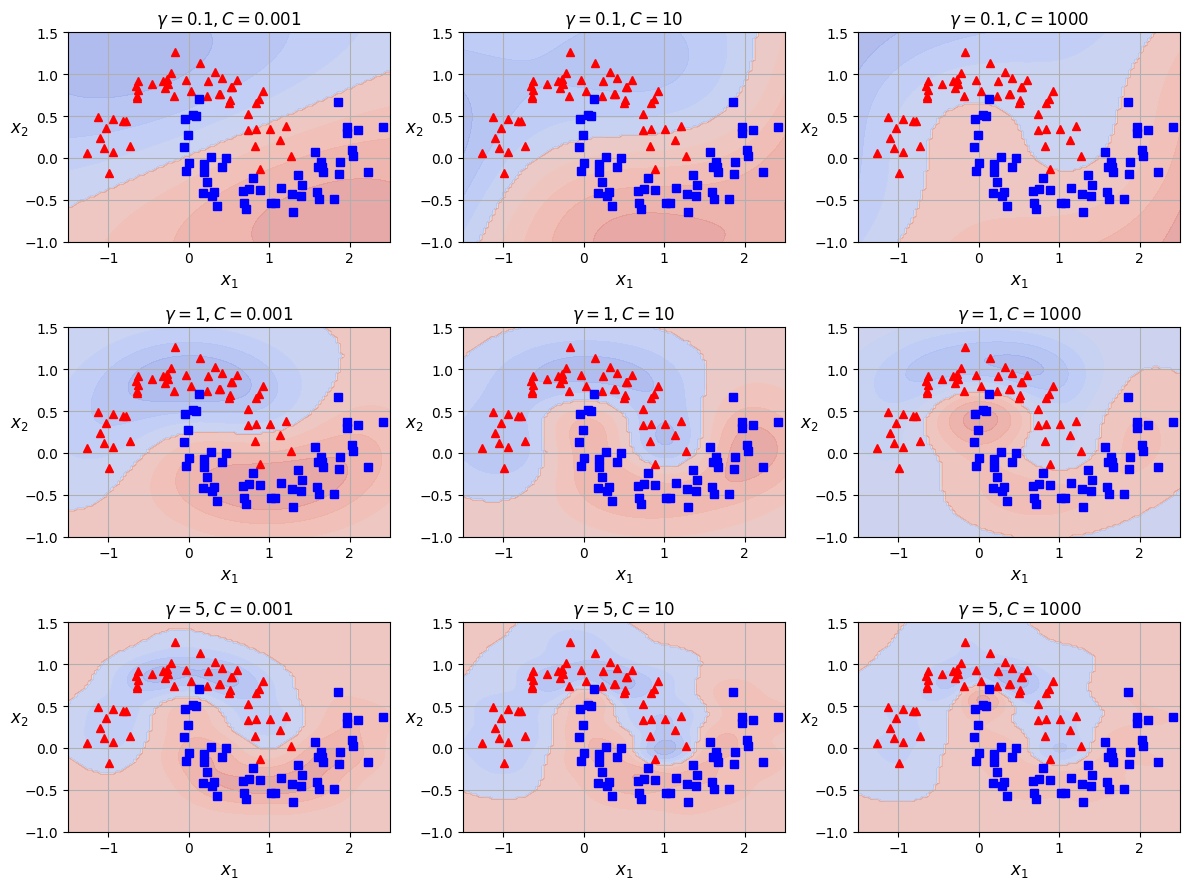

In [25]:
# Use loop to creat subplots
x_limits = [(-1.5, 2.5), (-1, 1.5)]

titles = create_titles(gamma_list, C_list)

fig, axes = plt.subplots(nrows=len(gamma_list), ncols=len(C_list), figsize=(12, 9))
axes = axes.ravel()  # Flatten the 3x3 array of axes for easier indexing

for axis, clf, title in zip(axes, rbf_clf_list, titles):
    plot_dataset(X, y, axis, title)
    plot_predictions(clf, x_limits, 100, axis)

plt.tight_layout()
plt.show()

As shown, increasing $\gamma$ or $C$ results in increasing the ability of the classifier to classify the training set more precisely. However, it also increases the chance of overfitting. Both $\gamma$ and $C$ ha ve a regularization effect.
- increase $\gamma$ or $C$ $\rightarrow$ overfitting
- decrease $\gamma$ or $C$ $\rightarrow$ underfitting